# Visualiser des données

Une étape importante dans tout effort d'analyse ou de modélisation des données consiste à comprendre comment les variables sont distribuées.

Les techniques de visualisation des distributions peuvent fournir des réponses rapides à de nombreuses questions importantes. Quelle est l'étendue des observations ? Quelle est leur tendance centrale ? Sont-elles fortement asymétriques dans une direction ? Existe-t-il des preuves de bimodalité ? Y a-t-il des valeurs aberrantes significatives ? Les réponses à ces questions varient-elles selon des sous-ensembles définis par d'autres variables ?

Dans la suite de ce document nous allons utiliser différentes bibliothèques pour visualiser et gérer les jeux de données:

 - *Matplotlib* [gallerie](https://matplotlib.org/stable/gallery/index.html)

    Bibliothèque très complète pour le tracé de graphiques

 - *Seaborn* [gallerie](https://seaborn.pydata.org/examples/index.html)

   Couche d'abstraction au-dessus de Matplotlib, elle offre une interface vraiment pratique pour créer une large gamme de types de graphiques, utiles en statistiques.
    Cependant, cela ne compromet pas la puissance. Seaborn permet d'accéder aux objets Matplotlib sous-jacents, permettant ainsi un contrôle total.

   
 - *Pandas*

   Pour gérer des jeux de données (importation, manipulation, ...)

In [38]:
import matplotlib as mpl
from matplotlib import pyplot as plt

import seaborn as sb
import pandas as pd

# utilisé ici pour numériser des catégories (encodage)
from sklearn import preprocessing 

# Etape préliminaire

Comprendre les données est l'une des étapes les plus importantes de l'analyse des données. Nous nous proposons de d'utiliser différentes methodes de la bibliothèque Pandas pour comprendre nos données.

Le but n'étant pas de voir ici, les différentes manières de cherger un jeu de données depuis différents types de fichiers (bases de données, fichier texte, csv, excel ...), nous utiliserons de jeux de données pré-établis.
Si on cherche à charger un jeu de données spécifiques les [fonctionnalités d'entrée sortie (Input/output)](https://pandas.pydata.org/docs/reference/io.html) de *Pandas* sont utiles, par exemple:
- pandas.read_csv
- pandas.read_excel
- pandas read_table
- ...

Réferez vous à la documentation de ces fonction d'entrée/sortie.


# Nous allons analyser des pingouins

<div style="align: left; text-align:center;">
    <img src="pingouins.png" alt="Alternative text" width="1080px" height="480px"/>
    <div class="caption">Figure 1 : Données mesurées</div>
</div>

In [39]:
# nous chargeons un jeu de données
penguins = sb.load_dataset("penguins")
# nous pouvons visualiser ces données
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [40]:
# taille
penguins.shape

(344, 7)

In [41]:
# recherche de données manquantes (fonction isnull)
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Les dataframes *Pandas* sont des dictionnaires. Chaque colonne est référencée pas sa clé et chaque ligne est référencée par son index. 

Nous pouvons donc accéder aux différents champs affichés ci dessus:

In [42]:
# clés
penguins.keys()

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [43]:
# valeurs de l'index
penguins.index

RangeIndex(start=0, stop=344, step=1)

In [44]:
# colonne 'ile'
penguins['island']

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 344, dtype: object

In [45]:
# ligne 12
penguins.loc[12]

species                 Adelie
island               Torgersen
bill_length_mm            41.1
bill_depth_mm             17.6
flipper_length_mm        182.0
body_mass_g             3200.0
sex                     Female
Name: 12, dtype: object

In [46]:
# combien avons nous d'espèces de pingouins différentes ?
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

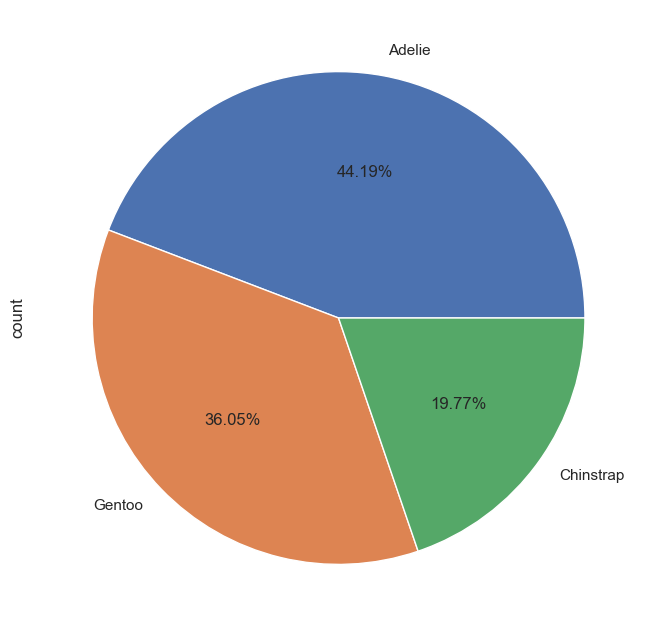

In [47]:
# Quelle est la répartition des obserations par espèces ?
Species=penguins.species.value_counts()
Species.plot(kind='pie',autopct="%.2f%%");

In [48]:
# Quelques statistiques (arrondies à une decimale)
penguins.describe().round(1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.0,342.0,342.0,342.0
mean,43.9,17.2,200.9,4201.8
std,5.5,2.0,14.1,802.0
min,32.1,13.1,172.0,2700.0
25%,39.2,15.6,190.0,3550.0
50%,44.4,17.3,197.0,4050.0
75%,48.5,18.7,213.0,4750.0
max,59.6,21.5,231.0,6300.0


# Nuage de points

Un tracé en nuage de points peut être utilisé pour afficher la relation entre différentes variables. Intéressons nous au nuage de points des longueurs et profondeurs des becs selon les espèces de manchots.

L'option *hue="nom_de_la_colonne"* des fonctions de tracées de *Seaborn* permets de colorier nos données en fonction des éléments uniques de la colonne choisie et ajoute une légende. 

In [49]:
## Nous pouvons fixer les dimensions des différents graphiques que nous allons réaliser avec Seaborn
sb.set_theme()
sb.set(rc = {"figure.figsize": (12,8), "figure.dpi" : 100})

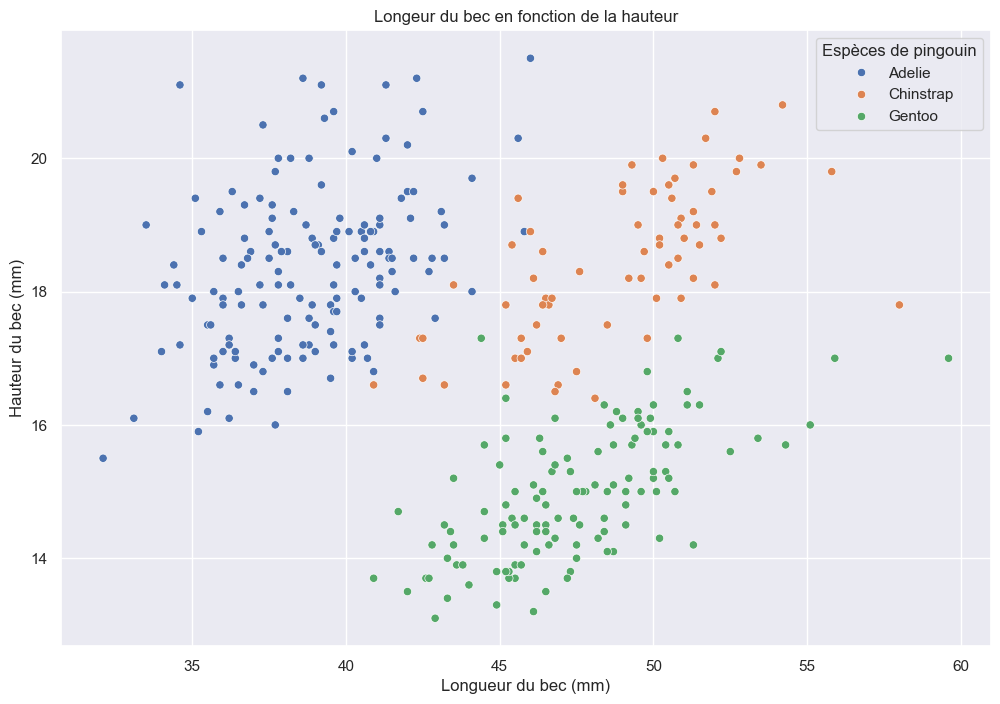

In [50]:
## avec seaborn
g = sb.scatterplot(x="bill_length_mm", y="bill_depth_mm", data=penguins, hue="species")
## ajout de titres et d'axes
g.get_legend().set_title("Espèces de pingouin") # modification du titre de la légende
plt.title("Longeur du bec en fonction de la hauteur")
plt.xlabel('Longueur du bec (mm)')
plt.ylabel('Hauteur du bec (mm)');

Nous voyons ici que les tailles de bec sont différenciantes pour les différentes espèces de pingouins. Si nous devions proposer un algorithme de classification des différentes espèces cette métrique serait une bonne base de départ.

# Tracé d'histogrammes monodimensionnels

L'approche la plus fréquente pour visualiser une distribution est l'histogramme. Un histogramme est un graphique à barres permettant de représenter la répartition empirique d'une variable aléatoire ou d'une série statistique en la représentant avec des colonnes correspondant chacune à une classe et dont l'aire est proportionnelle à l'effectif de la classe.

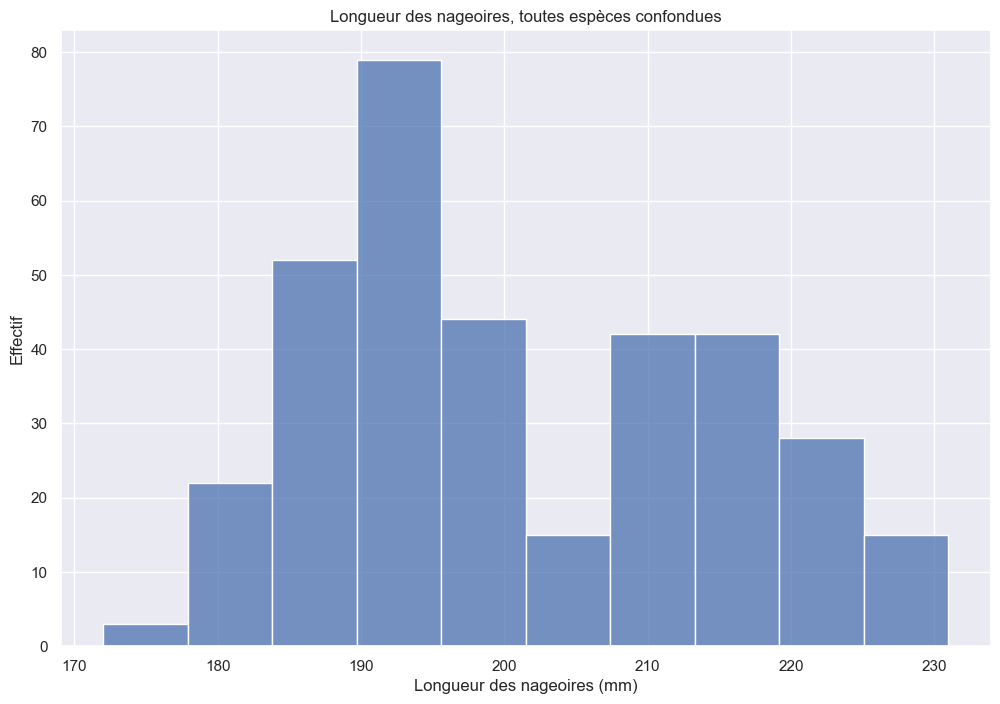

In [51]:
sb.histplot(x ="flipper_length_mm", data=penguins)
plt.title("Longueur des nageoires, toutes espèces confondues")
plt.xlabel('Longueur des nageoires (mm)')
plt.ylabel('Effectif');

L'histogramme ci-dessus affiche le nombre d'observations (effectif) qui se situent dans chaque intervalle. Nous pouvons modifier la taille de ces intervalles (classes) avec l'option *binwidth*.

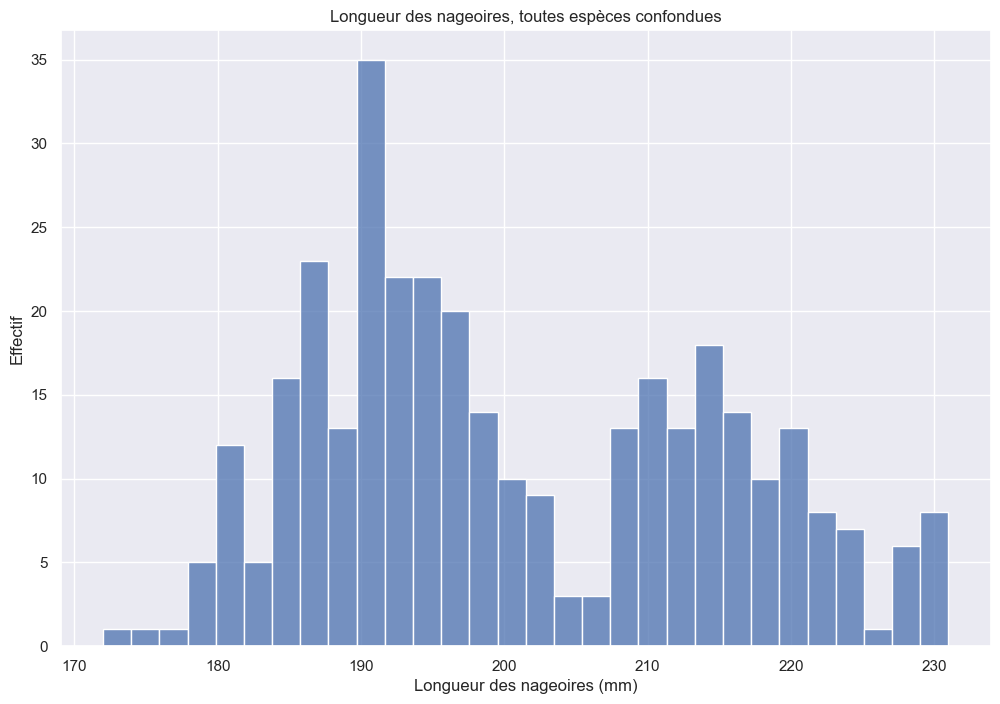

In [52]:
# intervalle de taille 2
sb.histplot(x = "flipper_length_mm", data = penguins, binwidth=2)
plt.title("Longueur des nageoires, toutes espèces confondues")
plt.xlabel('Longueur des nageoires (mm)')
plt.ylabel('Effectif');

Nous pouvons également ajouter une courbe, qui représente la distribution de probabilité de cet histogramme *kde=True*.

Il faut faire attention, il s'agit ici d'une [estimation de la densité de probabilité par noyau](https://fr.wikipedia.org/wiki/Estimation_par_noyau) (ou encore méthode de Parzen-Rosenblatt ; en anglais, kernel density estimation ou KDE). Cette méthode non-paramétrique d’estimation de la densité de probabilité d’une variable aléatoire est [sensible aux paramètres choisis](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

Si, comme c'est le cas ici, il existe plusieurs variable aléatoires ce n'est pas forcémént judicieux.

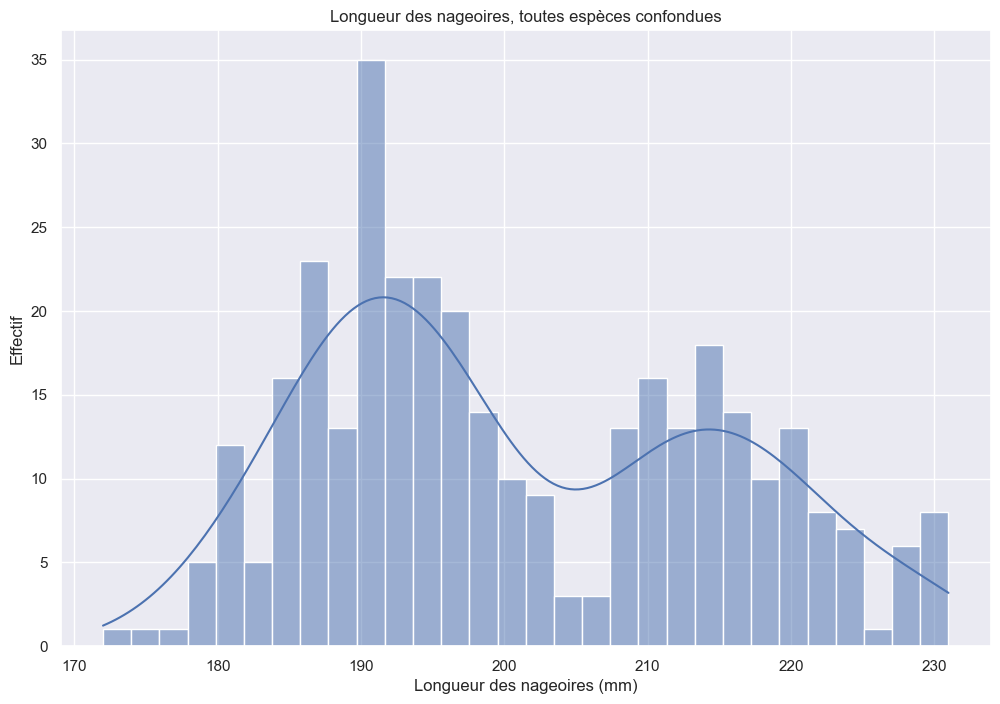

In [53]:
# intervalle de taille 2
sb.histplot(x = "flipper_length_mm", data = penguins, binwidth=2, kde=True)
plt.title("Longueur des nageoires, toutes espèces confondues")
plt.xlabel('Longueur des nageoires (mm)')
plt.ylabel('Effectif');

L'analyse de l'histogramme peut nous laisser supposer que nous avons deux variable aléatoires centrées sur différentes valeurs (environ 190 et 215).

Comme nous savons que nous avons plusieurs espèces de pingouins nous pouvons également tracer les histogrammes pas espèce. Nous réutilisons ici l'option *hue*

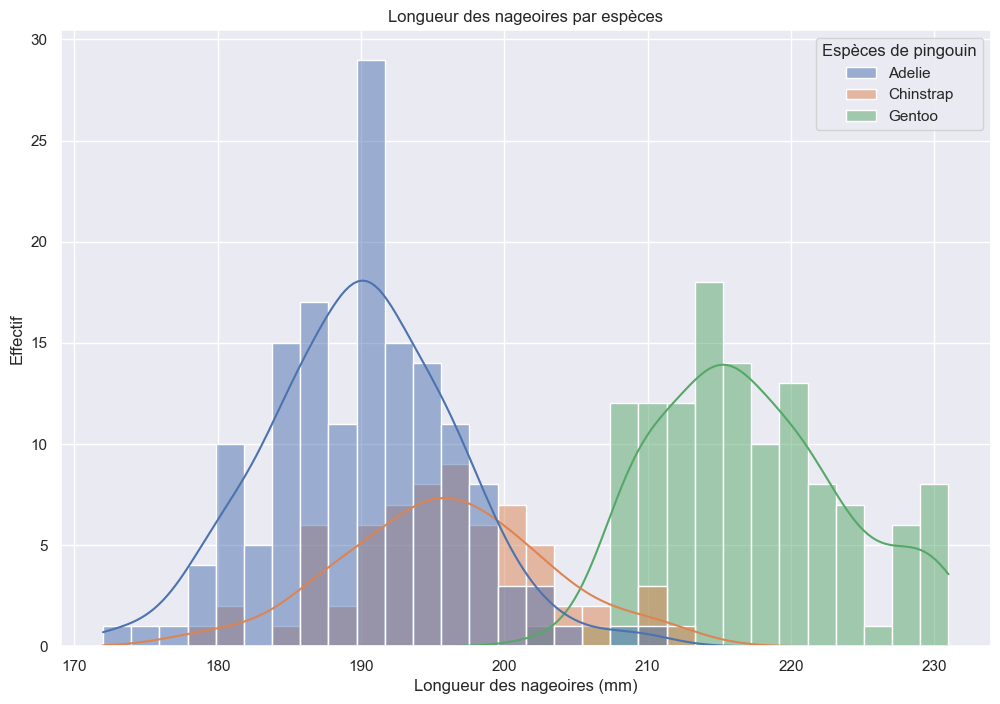

In [54]:
g = sb.histplot(x = "flipper_length_mm", data = penguins, binwidth=2, kde=True, hue = "species")
g.get_legend().set_title("Espèces de pingouin")
plt.title("Longueur des nageoires par espèces")
plt.xlabel('Longueur des nageoires (mm)')
plt.ylabel('Effectif');

# Histogrammes bi-dimensionnels

Pour des données plus complexes, un histogramme bi-dimmensionnel peut également être tracé

Il est plus compliqué de trouver les bonnes tailles de classe pour que les données aient du sens. Il s'agit d'un couple de taille de classe *binwidth=(width_x,width_y)*

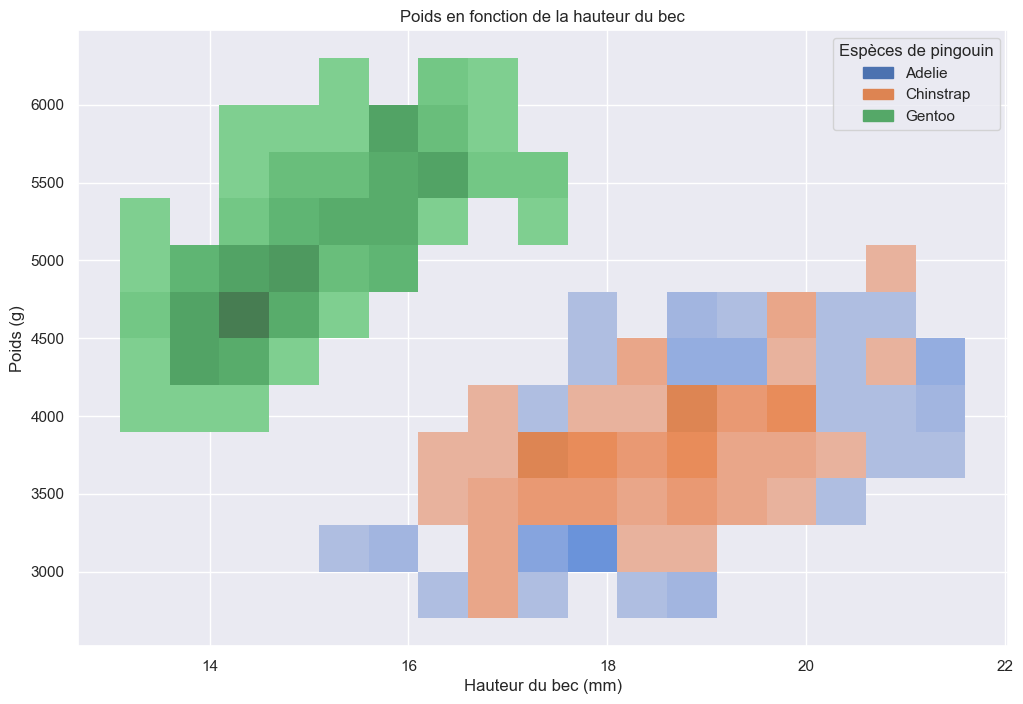

In [55]:
g = sb.histplot(penguins, x="bill_depth_mm", y="body_mass_g", hue="species", binwidth=(0.5,300))
g.get_legend().set_title("Espèces de pingouin")
plt.title("Poids en fonction de la hauteur du bec")
plt.xlabel('Hauteur du bec (mm)')
plt.ylabel('Poids (g)');


On peut également tracer la densité de probalitée estimée par la methode Parzen-Rosenblatt en 2D.

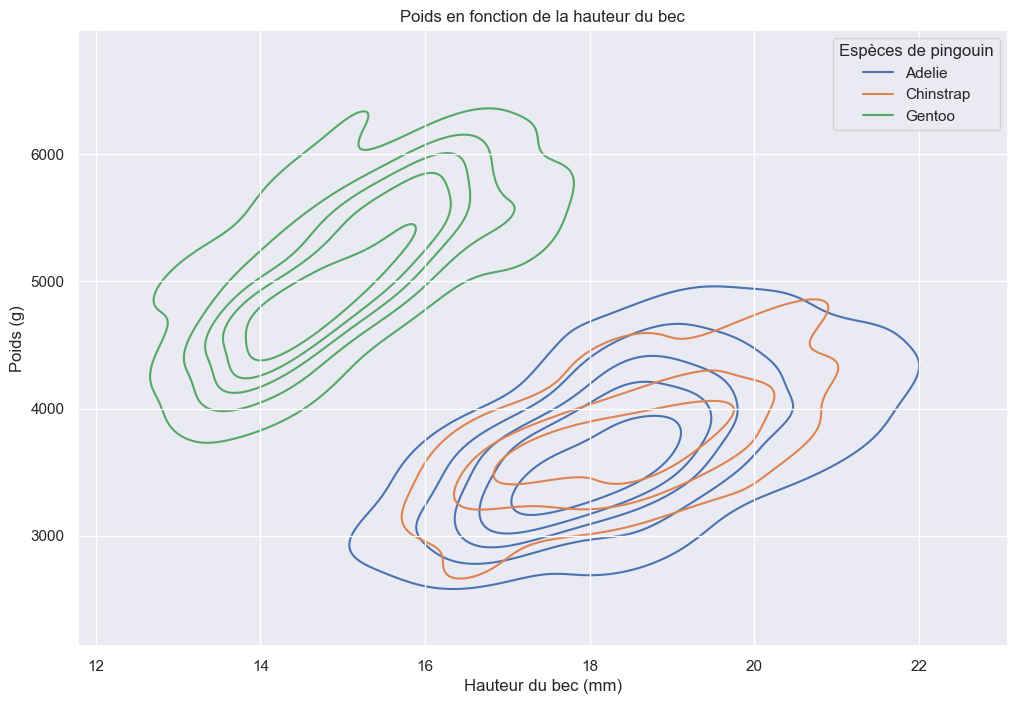

In [56]:
g = sb.kdeplot(penguins, x="bill_depth_mm", y="body_mass_g", hue="species",zorder=0, n_levels=6)
g.get_legend().set_title("Espèces de pingouin")
plt.title("Poids en fonction de la hauteur du bec")
plt.xlabel('Hauteur du bec (mm)')
plt.ylabel('Poids (g)');

# Relations entre les données (*pairplot*)

Précédement nous avons tracé les Nuages de points et les histogrammes de certaine colonnes de notre jeu de données. Si nous souhaitons analyser les relations des différentes données entre elle il est fastidieux de reproduire les étapes précédentes pour chaque variables.

Nous pouvons utiliser la méthode *pairplot* pour tracer les relations entre les paires de variables. Cette fonction nous permets d'afficher des graphiques croisés pour chaque variable numérique du jeu de données.

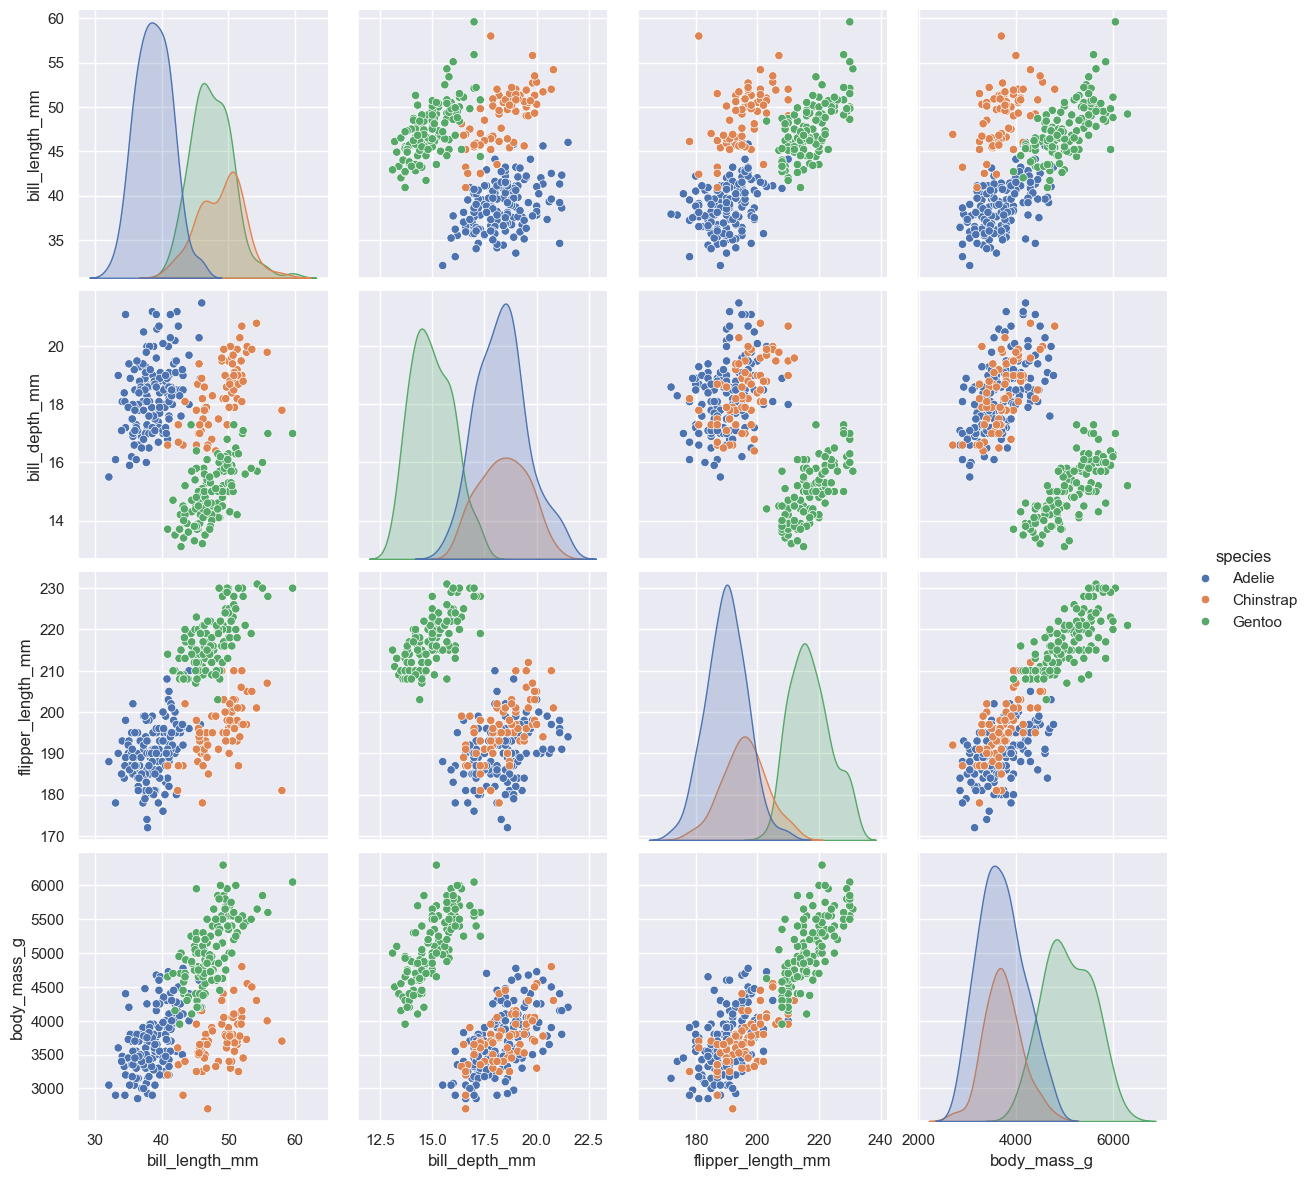

In [57]:
sb.pairplot(data=penguins, hue = "species", height=3);


# Régression linéaire (*lmplot*)

Si nos données semblent évoluer linéairement il peut être judicieux de tracer la régression linéaire de ces dernières, avec la fonction *lmplot*

In [58]:
# on ne regarde que l'espèce Adelie
Adelie = penguins.loc[penguins['species'] == "Adelie"]

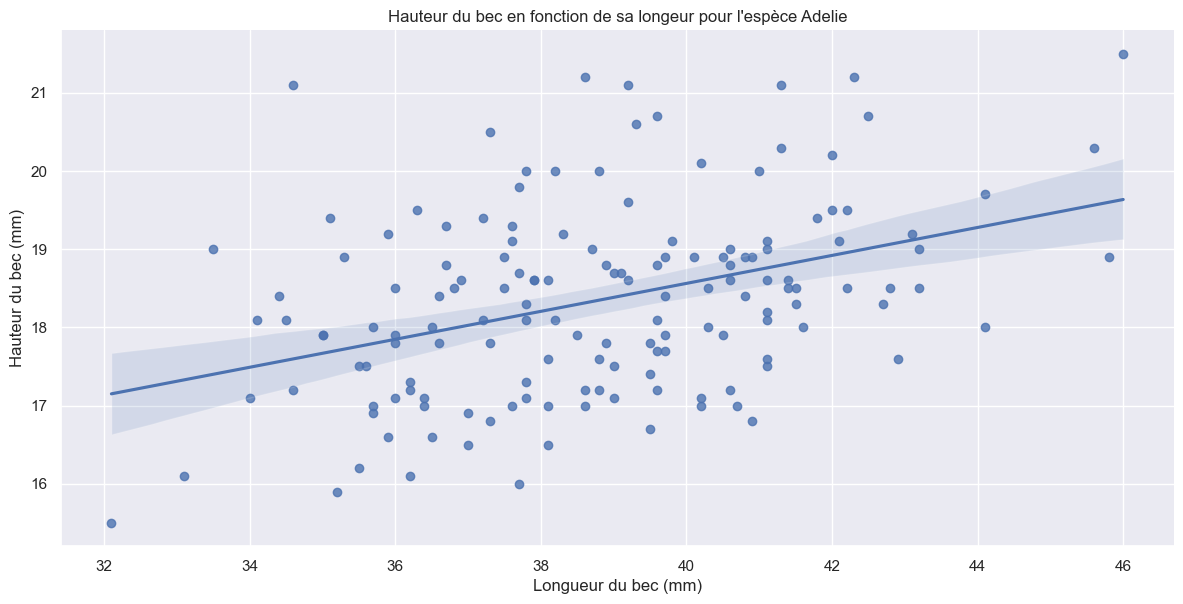

In [59]:
sb.lmplot(data=Adelie, x="bill_length_mm", y="bill_depth_mm", height=6, aspect=12/6);
plt.title("Hauteur du bec en fonction de sa longeur pour l'espèce Adelie")
plt.xlabel('Longueur du bec (mm)')
plt.ylabel('Hauteur du bec (mm)');

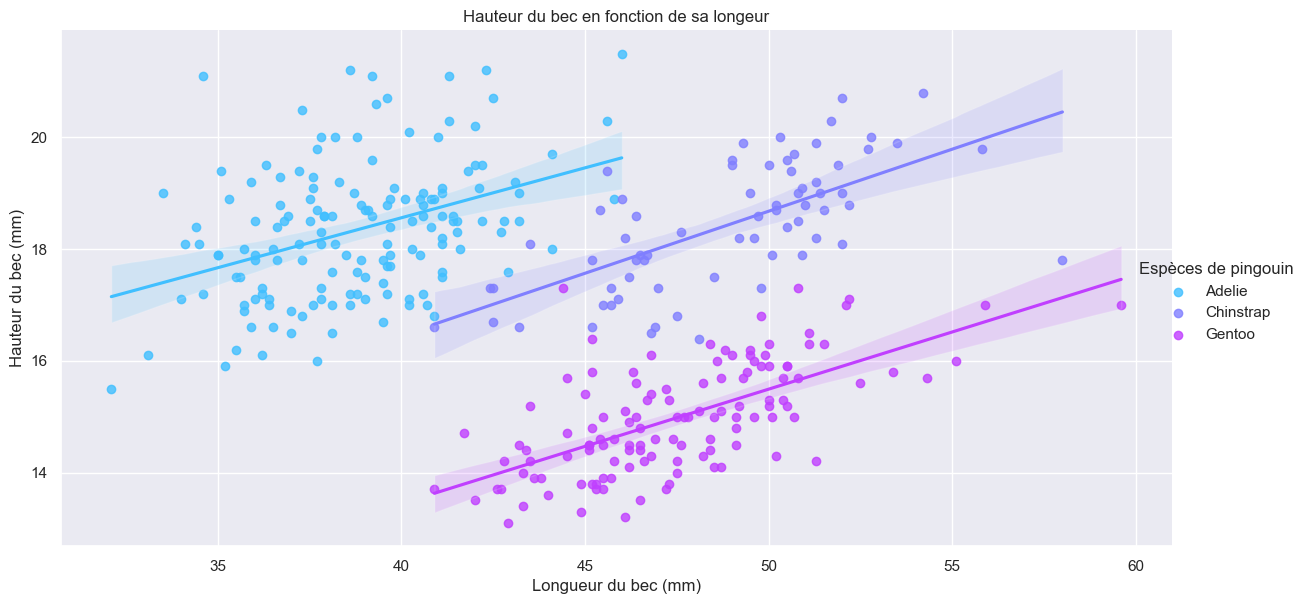

In [60]:
# pour l'ensemble des espèces
g = sb.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    legend=True,
    height=6, aspect=12/6, 
           palette='cool');
g.legend.set_title('Espèces de pingouin')
plt.title("Hauteur du bec en fonction de sa longeur")
plt.xlabel('Longueur du bec (mm)')
plt.ylabel('Hauteur du bec (mm)');

# Nos variables sont elles correlées ?

Inspecter la corrélation entre les variables est important pour identifier les caractéristiques potentielles que nous pouvons utiliser pour une analyse plus approfondie et, par la suite, pour la création de modèles.

La methode *corr* de *Pandas* permets de calculer la corrélation entre différentes variables d'un jeu de données.

Cette methode nécessite de convertir les données non numériques en entrées numériques (encodage de ces champs)



In [61]:
# Encodeur de données textuelles en entiers
label_encoder = preprocessing.LabelEncoder()

# Encodage (fonction fit_transform)
penguins['species'] = label_encoder.fit_transform(penguins['species'])
penguins["island"] = label_encoder.fit_transform(penguins["island"])
penguins["sex"] = label_encoder.fit_transform(penguins["sex"])

In [62]:
corr = penguins.corr()

La fonction *heatmap* de *Seaborne* permets de tracer une matrice de corrélation. 

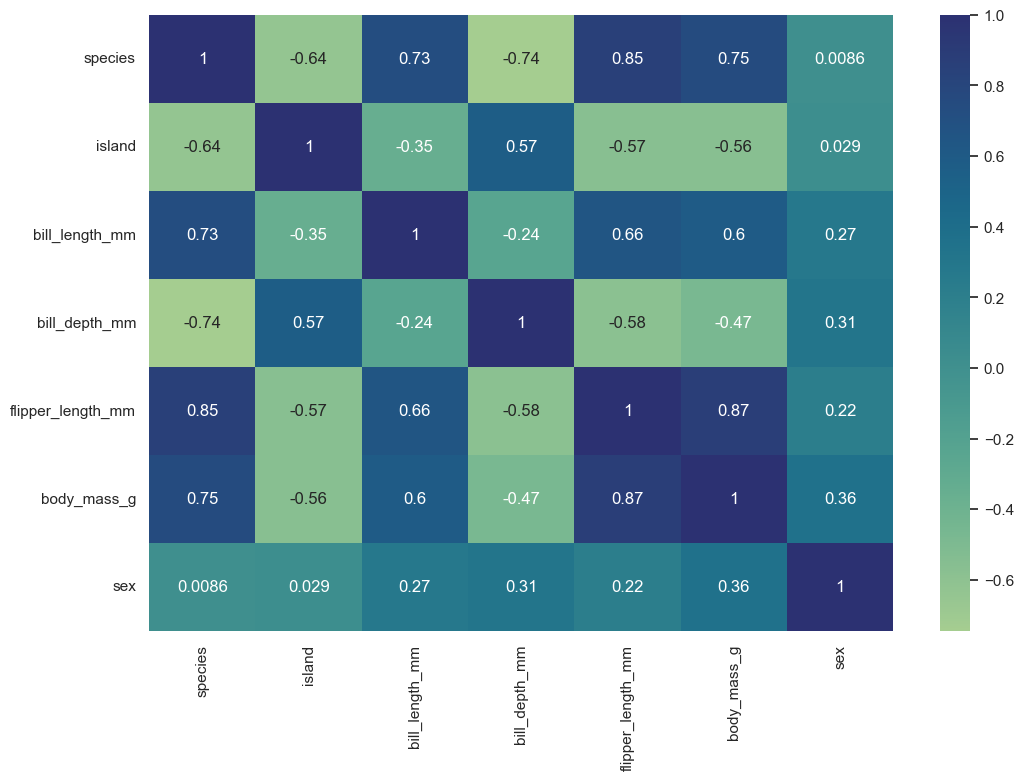

In [63]:
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, cmap= 'crest');

Les variables (poids, longueur de nageoire), (espèce, longueur de nageoire) et (espèce, poids) sont les plus fortement corréllées, respectivement 0,87 0,85 et 0,75. 

# Ressources pour aller plus loin

Manuel d'analyse et de visualisation de données avec python ([neuraldatascience](https://neuraldatascience.io/intro.html))

Beaucoup de notebook, de jeux de données et d'exemples pour l'IA et le Machine Learning ([kaggle](https://www.kaggle.com/))

Les pingouins analysés autrement [pingu1](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris), [pingu2](https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn)

Autres bibliothèques de [visualization](https://makemeanalyst.com/top-5-python-libraries-for-data-visualization/)